In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
# Loading data 
df = pd.read_csv("Urban_Grocers.csv")

In [27]:
# Printing first few rows
df.head()

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase
0,1/1/2023,C,5W9bBXa2QE,Vegetables,3,71.92,0,1,Rainy,Cash
1,1/2/2023,C,CYVvGzEfX6,Fruits,47,44.60,0,0,Cloudy,Credit Card
2,1/3/2023,C,HfhZ99ML1Y,Bread,4,65.61,1,0,Sunny,Cash
3,1/4/2023,B,1VcGmwPXOx,Milk,21,79.29,0,0,Cloudy,Debit Card
4,1/5/2023,C,I4SUTh6RGM,Milk,1,54.44,0,0,Rainy,Cash


In [28]:
# Checking data types and looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             240000 non-null  object 
 1   Store_ID         240000 non-null  object 
 2   Transaction_ID   240000 non-null  object 
 3   Food_Category    240000 non-null  object 
 4   Units_Sold       240000 non-null  int64  
 5   Price_per_Unit   240000 non-null  float64
 6   Promotion        240000 non-null  int64  
 7   Holiday_Weekend  240000 non-null  int64  
 8   Weather          240000 non-null  object 
 9   Mode_Purchase    240000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 18.3+ MB


In [29]:
# change date type
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             240000 non-null  datetime64[ns]
 1   Store_ID         240000 non-null  object        
 2   Transaction_ID   240000 non-null  object        
 3   Food_Category    240000 non-null  object        
 4   Units_Sold       240000 non-null  int64         
 5   Price_per_Unit   240000 non-null  float64       
 6   Promotion        240000 non-null  int64         
 7   Holiday_Weekend  240000 non-null  int64         
 8   Weather          240000 non-null  object        
 9   Mode_Purchase    240000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 18.3+ MB


In [30]:
# Calculating sales
df['Sales'] = df['Units_Sold'] * df['Price_per_Unit']

# Calculating profit
df['Profit'] = df['Sales'] * 0.14

df.head()

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase,Sales,Profit
0,2023-01-01,C,5W9bBXa2QE,Vegetables,3,71.92,0,1,Rainy,Cash,215.76,30.2064
1,2023-01-02,C,CYVvGzEfX6,Fruits,47,44.60,0,0,Cloudy,Credit Card,2096.20,293.4680
2,2023-01-03,C,HfhZ99ML1Y,Bread,4,65.61,1,0,Sunny,Cash,262.44,36.7416
3,2023-01-04,B,1VcGmwPXOx,Milk,21,79.29,0,0,Cloudy,Debit Card,1665.09,233.1126
4,2023-01-05,C,I4SUTh6RGM,Milk,1,54.44,0,0,Rainy,Cash,54.44,7.6216


In [31]:
# Extracting month
df['Month'] = df['Date'].dt.to_period('M')

# Extracting day type
df['Day_Type'] = df['Date'].dt.day_name().apply(lambda x:'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df.head()

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase,Sales,Profit,Month,Day_Type
0,2023-01-01,C,5W9bBXa2QE,Vegetables,3,71.92,0,1,Rainy,Cash,215.76,30.2064,2023-01,Weekend
1,2023-01-02,C,CYVvGzEfX6,Fruits,47,44.60,0,0,Cloudy,Credit Card,2096.20,293.4680,2023-01,Weekday
2,2023-01-03,C,HfhZ99ML1Y,Bread,4,65.61,1,0,Sunny,Cash,262.44,36.7416,2023-01,Weekday
3,2023-01-04,B,1VcGmwPXOx,Milk,21,79.29,0,0,Cloudy,Debit Card,1665.09,233.1126,2023-01,Weekday
4,2023-01-05,C,I4SUTh6RGM,Milk,1,54.44,0,0,Rainy,Cash,54.44,7.6216,2023-01,Weekday


In [32]:
# Changing promotion and holiday_weekend to boolean
df['Promotion'] = df['Promotion'].astype(bool)
df['Holiday_Weekend'] = df['Holiday_Weekend'].astype(bool)

df.head()

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase,Sales,Profit,Month,Day_Type
0,2023-01-01,C,5W9bBXa2QE,Vegetables,3,71.92,False,True,Rainy,Cash,215.76,30.2064,2023-01,Weekend
1,2023-01-02,C,CYVvGzEfX6,Fruits,47,44.60,False,False,Cloudy,Credit Card,2096.20,293.4680,2023-01,Weekday
2,2023-01-03,C,HfhZ99ML1Y,Bread,4,65.61,True,False,Sunny,Cash,262.44,36.7416,2023-01,Weekday
3,2023-01-04,B,1VcGmwPXOx,Milk,21,79.29,False,False,Cloudy,Debit Card,1665.09,233.1126,2023-01,Weekday
4,2023-01-05,C,I4SUTh6RGM,Milk,1,54.44,False,False,Rainy,Cash,54.44,7.6216,2023-01,Weekday


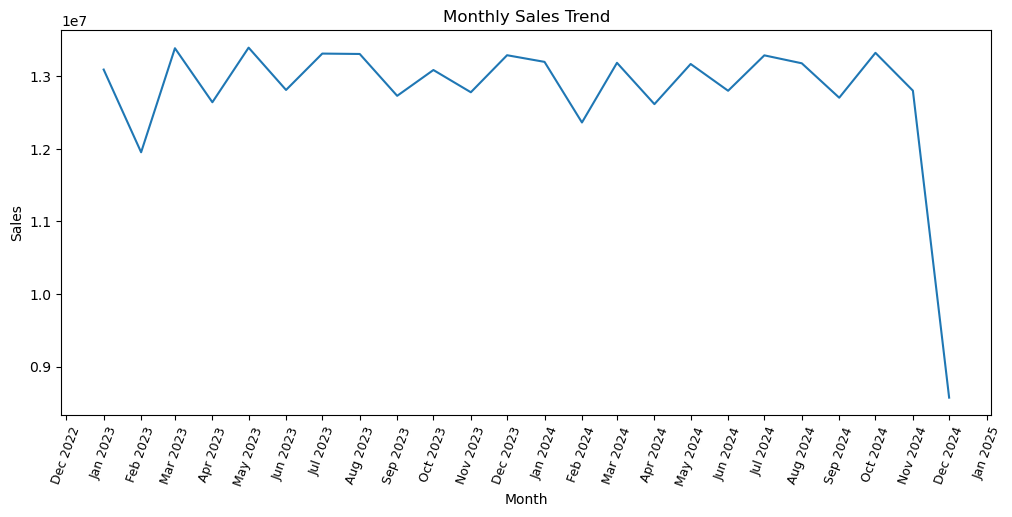

In [41]:
# Sales Trend Analysis

import matplotlib.dates as mdates

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
# converting period to timestamp
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data = monthly_sales, x = 'Month', y = 'Sales')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())            # plotting each month    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Jan 2023

plt.xticks(rotation=70, fontsize=9)
plt.title('Monthly Sales Trend')
plt.show()

In [44]:
# Holiday and Weekend Impact Analysis

impact_analysis = df.groupby(['Holiday_Weekend', 'Food_Category'])['Units_Sold'].mean().unstack()

print("\nAverage Units Sold Comparison:")
print(impact_analysis)


Average Units Sold Comparison:
Food_Category        Bread     Fruits       Meat       Milk  Vegetables
Holiday_Weekend                                                        
False            25.473757  25.482612  25.647634  25.608146   25.527346
True             25.707447  25.560496  25.737829  25.627592   25.285110


In [45]:
# Average units sold based on promotion status
promotion_impact = df.groupby(['Promotion'])['Units_Sold'].mean().reset_index()

# Percentage increase
base_units = promotion_impact.loc[promotion_impact['Promotion'] == False, 'Units_Sold'].iloc[0]
promo_units = promotion_impact.loc[promotion_impact['Promotion'] == True, 'Units_Sold'].iloc[0]
percent_increase = ((promo_units - base_units) / base_units) * 100

print(f"\nAverage Units Sold Without Promotion: {base_units:.2f}")
print(f"Average Units Sold With Promotion: {promo_units:.2f}")
print(f"Promotion leads to a {percent_increase:.2f}% increase in Units Sold.")


Average Units Sold Without Promotion: 25.56
Average Units Sold With Promotion: 25.57
Promotion leads to a 0.04% increase in Units Sold.


In [46]:
# Daily sales per store
daily_sales_by_store = df.groupby(['Date', 'Store_ID'])['Sales'].sum().reset_index()

# Standard deviation of daily sales for each store
volatility_analysis = daily_sales_by_store.groupby('Store_ID')['Sales'].agg(['mean', 'std']).reset_index()
volatility_analysis.rename(columns={'std': 'Volatility_StdDev'}, inplace=True)

# Coefficient of Variation
volatility_analysis['Coefficient_of_Variation'] = volatility_analysis['Volatility_StdDev'] / volatility_analysis['mean']
volatility_analysis.sort_values(by='Coefficient_of_Variation', ascending=False, inplace=True)

print("\nStore Volatility Analysis:")
print(volatility_analysis)


Store Volatility Analysis:
  Store_ID           mean  Volatility_StdDev  Coefficient_of_Variation
0        A  106376.657500       13015.899373                  0.122357
3        D  107030.740736       12863.037277                  0.120181
2        C  106747.998514       12794.781853                  0.119860
1        B  106206.804625       12296.624530                  0.115780


In [49]:
# Overall and Category Specific Demand

# Overall demand (Average Units Sold per Transaction by Store)
overall_demand_pivot = df.groupby(['Store_ID'])['Units_Sold'].mean()

print("\nOverall Demand Summary (Average Units Sold per Transaction):")
print(overall_demand_pivot.to_markdown())

# Category-Specific Demand (Average Units Sold per Transaction by Store)
category_demand_pivot = df.groupby(['Food_Category', 'Store_ID'])['Units_Sold'].mean().unstack()

print("\nCategory Specific Demand Summary (Average Units Sold per Transaction):")
print(category_demand_pivot.to_markdown())


Overall Demand Summary (Average Units Sold per Transaction):
| Store_ID   |   Units_Sold |
|:-----------|-------------:|
| A          |      25.5165 |
| B          |      25.5635 |
| C          |      25.5473 |
| D          |      25.6055 |

Category Specific Demand Summary (Average Units Sold per Transaction):
| Food_Category   |       A |       B |       C |       D |
|:----------------|--------:|--------:|--------:|--------:|
| Bread           | 25.3169 | 25.5787 | 25.5574 | 25.7122 |
| Fruits          | 25.4494 | 25.504  | 25.3618 | 25.7034 |
| Meat            | 25.6215 | 25.6101 | 25.6699 | 25.792  |
| Milk            | 25.7086 | 25.5763 | 25.5281 | 25.6411 |
| Vegetables      | 25.4911 | 25.547  | 25.6204 | 25.177  |


In [62]:
# Demand Forecasting for Milk 

# Daily demand
milk_df = df[df['Food_Category'] == 'Milk']
daily_milk_demand = milk_df.groupby('Date')['Units_Sold'].sum().reset_index()
daily_milk_demand.set_index('Date', inplace=True)

# Last date from historical milk demand
last_date = daily_milk_demand.index.max()

# Next 90 days (one quarter)
future_days = 90
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=future_days, freq='D')

# Combine historical + empty future rows
full_df = pd.concat([daily_milk_demand, pd.DataFrame(index=future_dates)])
full_df['Units_Sold'] = full_df['Units_Sold'].astype(float)

# 30 day moving average forecasting
for day in future_dates:
    window_end = day - pd.Timedelta(days=1)
    window_start = window_end - pd.Timedelta(days=29)

    window = full_df.loc[window_start:window_end, 'Units_Sold']

    if window.notna().sum() == 0:
        forecast = pd.NA
    else:
        forecast = window.mean()

    full_df.loc[day, 'Demand_Forecast'] = forecast
    full_df.loc[day, 'Units_Sold'] = forecast  # feed forecast forward

# 5. Show only the true future forecasts
future_forecasts = full_df.loc[future_dates, ['Units_Sold', 'Demand_Forecast']]
# pd.set_option('display.max_rows', 90)
#pd.reset_option('display.max_rows')
print(future_forecasts)

             Units_Sold  Demand_Forecast
2024-12-21  1662.533333      1662.533333
2024-12-22  1655.351111      1655.351111
2024-12-23  1663.829481      1663.829481
2024-12-24  1662.557131      1662.557131
2024-12-25  1670.509035      1670.509035
...                 ...              ...
2025-03-16  1680.810178      1680.810178
2025-03-17  1680.786554      1680.786554
2025-03-18  1680.780668      1680.780668
2025-03-19  1680.795440      1680.795440
2025-03-20  1680.823243      1680.823243

[90 rows x 2 columns]


**Insights & Recommendations**

Sales per transaction are very stable across stores and categories
Store A shows the highest demand volatility, so it needs better forecasting and safety stock
Monthly sales show seasonal peaks in mid‑year and a decline toward the end, so planning should be season aware
Promotions only increase units sold by ~0.04%, so shift from blanket discounts to targeted, category-wise offers
Holidays/weekends slightly boost demand (especially bread/meat), so stock up then and trim inventory on normal days to cut wastage